In [2]:
import tensorflow as tf
import keras
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data_dir = '/kaggle/input/140k-real-and-fake-faces'

In [4]:
train_dt = tf.keras.utils.image_dataset_from_directory('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train')
#valid_dt = tf.keras.utils.image_dataset_from_directory('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid')
#test_dt = tf.keras.utils.image_dataset_from_directory('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test')

Found 100000 files belonging to 2 classes.


2022-12-25 13:03:11.088236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 13:03:11.089436: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 13:03:11.220173: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 13:03:11.221110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-25 13:03:11.222037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [5]:
train_dt

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [6]:
dt_itre = train_dt.as_numpy_iterator()
batch = dt_itre.next()

2022-12-25 13:03:14.786409: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [7]:
len(batch)
batch[0].shape

(32, 256, 256, 3)

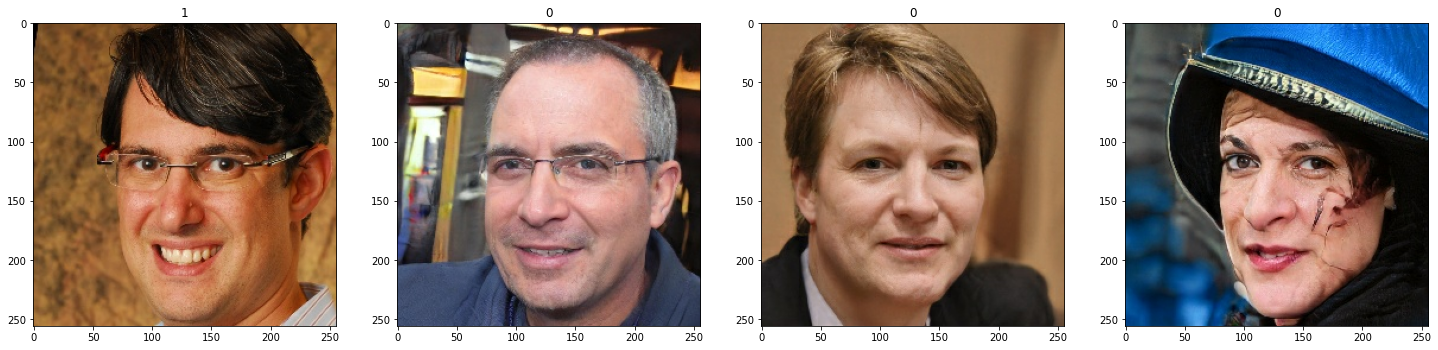

In [8]:
fig , ax  = plt.subplots(ncols = 4, figsize = (25,25))
for  idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [9]:
data = train_dt.map(lambda x,y :(x/255, y))

In [10]:
scl = data.as_numpy_iterator()

In [11]:
batch = scl.next()

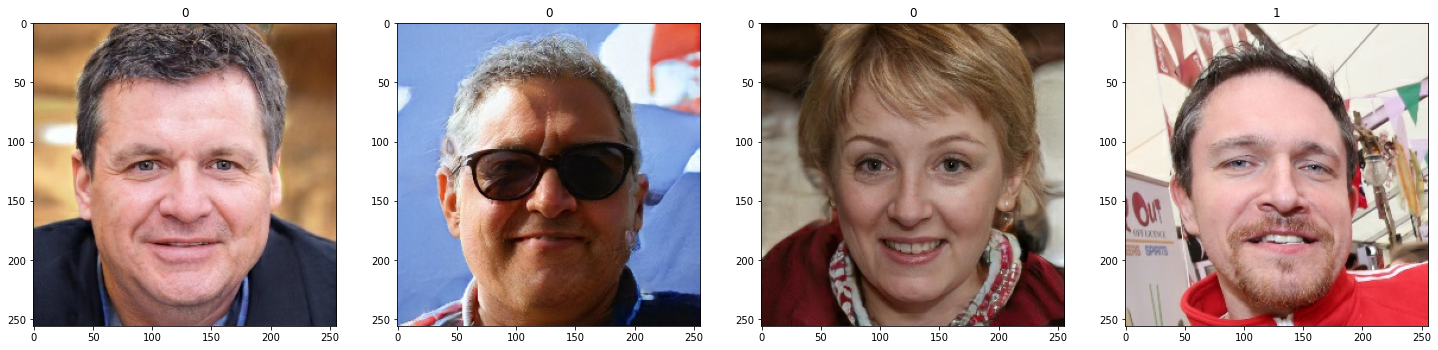

In [12]:
fig , ax  = plt.subplots(ncols = 4, figsize = (25,25))
for  idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [13]:
len(data)

3125

In [14]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1) +1

In [15]:
train_size + val_size + test_size

3125

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy

In [18]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [23]:
#early stoping
es = EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=5,verbose=1, mode='auto')
# check point
mc = ModelCheckpoint(monitor='val_accuracy', filepath="/kaggle/working/bestmodel.h5", verbose=1, save_best_only=True, mode= 'auto')

cd= [es,mc]

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=cd)

Epoch 1/20


2022-12-25 13:03:20.690572: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2187/2187 [==============================] - 399s 178ms/step - loss: 0.5010 - accuracy: 0.7478 - val_loss: 0.3693 - val_accuracy: 0.8357

Epoch 00001: val_accuracy improved from -inf to 0.83575, saving model to /kaggle/working/bestmodel.h5
Epoch 2/20
2187/2187 [==============================] - 217s 99ms/step - loss: 0.2841 - accuracy: 0.8801 - val_loss: 0.2674 - val_accuracy: 0.8874

Epoch 00002: val_accuracy improved from 0.83575 to 0.88735, saving model to /kaggle/working/bestmodel.h5
Epoch 3/20
2187/2187 [==============================] - 220s 100ms/step - loss: 0.1620 - accuracy: 0.9358 - val_loss: 0.3051 - val_accuracy: 0.8880

Epoch 00003: val_accuracy improved from 0.88735 to 0.88795, saving model to /kaggle/working/bestmodel.h5
Epoch 4/20
2187/2187 [==============================] - 214s 98ms/step - loss: 0.0875 - accuracy: 0.9672 - val_loss: 0.3529 - val_accuracy: 0.8954

Epoch 00004: val_accuracy improved from 0.88795 to 0.89540, saving model to /kaggle/working/bestmodel.h5


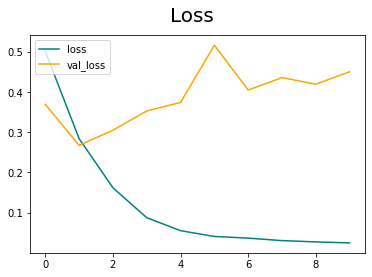

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

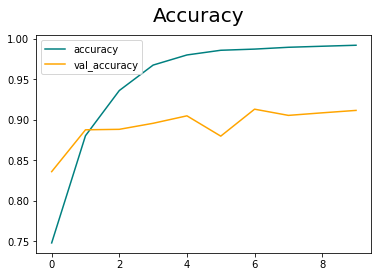

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [27]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [28]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9226227, shape=(), dtype=float32) tf.Tensor(0.8945706, shape=(), dtype=float32) tf.Tensor(0.908746, shape=(), dtype=float32)


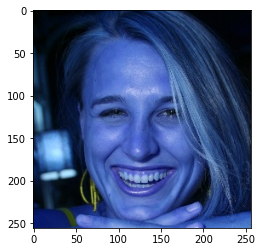

In [36]:
img = cv2.imread('/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test/real/00001.jpg',cv2.IMREAD_COLOR)
#img = img_to_array(img)
plt.imshow(img)
plt.show()

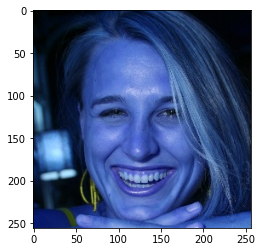

In [37]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [38]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [39]:
yhat

array([[0.8952402]], dtype=float32)

In [40]:
if yhat > 0.5: 
    print(f'Predicted class is real')
else:
    print(f'Predicted class is fake')

Predicted class is real
